In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import ipywidgets as widgets
from IPython.display import display
from enhancement_analysis import *

%matplotlib inline

# Sample

# some_data = analysis.processAll(folder_path=string,start_num,stop_num,
                                # skips=list,initial_blocked,alternate,
                                # start_stop_YbOH=list,start_stop_Yb=list,indep_var=list/array)
         
# Can also use analysis.getODsfromRaw(folder_path,start_num,stop_num,skips,initial_blocked,alternate)
# just use the returned list as an argument for analysis.integrateODs

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

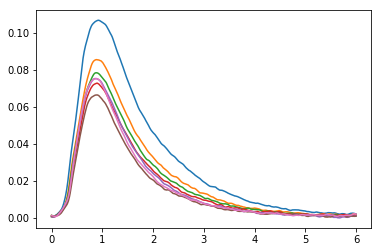

In [19]:
ODs,params=calculateSeriesOD('20190212',0,6)
b_300 = integrateODSeries(ODs,params,[0,6])[1:]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

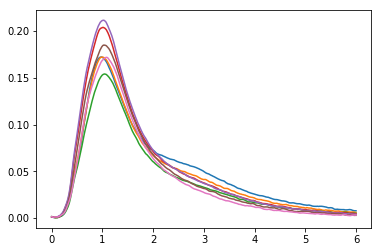

In [20]:
ODs,params=calculateSeriesOD('20190212',7,13)
ub_300 = integrateODSeries(ODs,params,[0,6])[1:]

In [31]:
ub_list = [ub_300]
b_list = [b_300]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

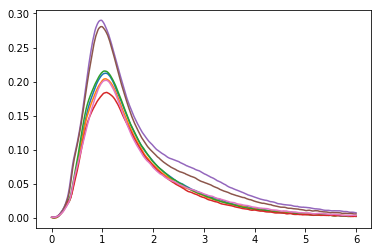

In [41]:
ODs,params=calculateSeriesOD('20190212',21,29)
x = integrateODSeries(ODs,params,[0,6])

In [42]:
b_list.append(x)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

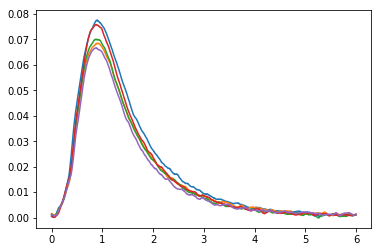

In [48]:
ODs,params=calculateSeriesOD('20190212',49,53)
x = integrateODSeries(ODs,params,[0,6])

In [63]:
b_list

[array([0.134763, 0.119933, 0.108981, 0.106761, 0.093449, 0.104081]),
 array([0.199656, 0.159013, 0.11876 , 0.125343, 0.136999, 0.105062,
        0.116491, 0.122249]),
 array([0.090378, 0.096757, 0.093335, 0.105314, 0.113479, 0.119963]),
 array([0.116506, 0.102067, 0.100879, 0.10703 , 0.095071])]

In [52]:
ub_all=[]
for meas in ub_list:
    for trace in meas:
        ub_all.append(trace)
ub_all

[0.294846,
 0.256116,
 0.320894,
 0.329346,
 0.289261,
 0.262637,
 0.446984,
 0.424104,
 0.374038,
 0.363961,
 0.378889,
 0.356905,
 0.340399,
 0.364448,
 0.321406,
 0.338014,
 0.33896,
 0.330793,
 0.31624,
 0.333651,
 0.294349,
 0.472853,
 0.430836,
 0.3139]

In [65]:
b_all=[]
for meas in b_list:
    for trace in meas:
        b_all.append(trace)
b_all

[0.134763,
 0.119933,
 0.108981,
 0.106761,
 0.093449,
 0.104081,
 0.199656,
 0.159013,
 0.11876,
 0.125343,
 0.136999,
 0.105062,
 0.116491,
 0.122249,
 0.090378,
 0.096757,
 0.093335,
 0.105314,
 0.113479,
 0.119963,
 0.116506,
 0.102067,
 0.100879,
 0.10703,
 0.095071]

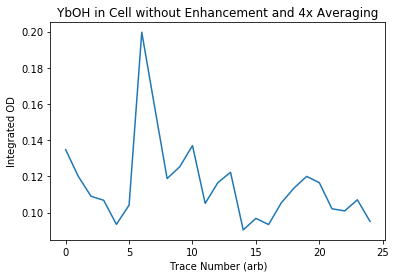

In [66]:
plt.figure()
plt.plot(b_all)
plt.title('YbOH in Cell without Enhancement and 4x Averaging')
plt.xlabel('Trace Number (arb)')
plt.ylabel('Integrated OD');

In [57]:
ub300_avg = [meas.mean() for meas in ub_list]

In [68]:
b300_avg = [meas.mean() for meas in b_list]

In [110]:
ub300_err = [meas.std()/np.sqrt(meas.size) for meas in ub_list]

In [111]:
b300_err = [meas.std()/np.sqrt(meas.size) for meas in b_list]

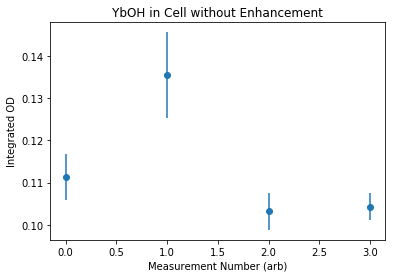

In [114]:
plt.figure()
plt.errorbar(x=list(range(len(b300_avg))),y=b300_avg,yerr=b300_err,marker='o',linestyle='None')
plt.title('YbOH in Cell without Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

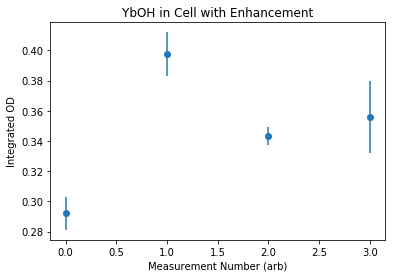

In [115]:
plt.figure()
plt.errorbar(x=list(range(len(ub300_avg))),y=ub300_avg,yerr=ub300_err,marker='o',linestyle='None')
plt.title('YbOH in Cell with Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

In [81]:
enhance_300 = [ub/b for ub,b in zip(ub300_avg,b300_avg)]

In [101]:
def rel_error(x,y,xerr,yerr):
    return np.sqrt((xerr/x)**2+(yerr/y)**2)

In [116]:
enhance_300_err = [rel_error(ub,b,ub_err,b_err)*ub/b for ub,b,ub_err,b_err in zip(ub300_avg,b300_avg,ub300_err,b300_err)]

In [117]:
enhance_300_err

[0.16007576593204073,
 0.24315395825366973,
 0.15194340687906935,
 0.25045624703123753]

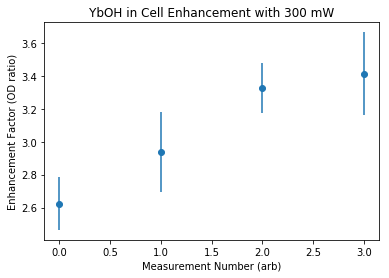

In [118]:
plt.figure()
plt.errorbar(x=list(range(len(ub300_avg))),y=enhance_300,yerr=enhance_300_err,marker='o',linestyle='None')
plt.title('YbOH in Cell Enhancement with 300 mW')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Enhancement Factor (OD ratio)');

In [281]:
x=np.array(enhance_300)
print(x.mean())
print(x.std())

3.0751620188779576
0.31647382294719356


In [126]:
power_data = [[300],[3.075],[0.158]] #Powers, Enhancements, Errors

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

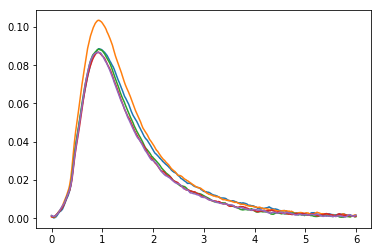

In [128]:
ODs,params=calculateSeriesOD('20190212',54,58)
b_500 = integrateODSeries(ODs,params,[0,6])

In [129]:
b500_list = [b_500]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

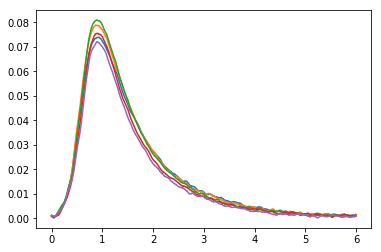

In [132]:
ODs,params=calculateSeriesOD('20190212',73,77)
b_500 = integrateODSeries(ODs,params,[0,6])

In [133]:
b500_list.append(b_500)

In [135]:
ub500_list = [ub_500]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

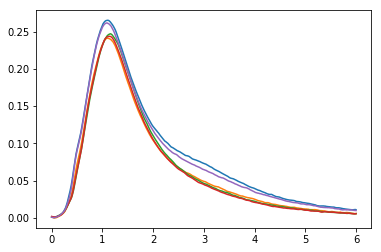

In [139]:
ODs,params=calculateSeriesOD('20190212',78,82)
ub_500 = integrateODSeries(ODs,params,[0,6])

In [140]:
ub500_list.append(ub_500[1:])

In [146]:
ub500_list

[array([0.475779, 0.46539 , 0.427815, 0.418765, 0.383868]),
 array([0.391596, 0.395528, 0.37697 , 0.373581]),
 array([0.400803, 0.401812, 0.39212 , 0.469856])]

In [147]:
ub500_avg = [meas.mean() for meas in ub500_list]

In [148]:
b500_avg = [meas.mean() for meas in b500_list]

In [149]:
ub500_err = [meas.std()/np.sqrt(meas.size) for meas in ub500_list]

In [150]:
b500_err = [meas.std()/np.sqrt(meas.size) for meas in b500_list]

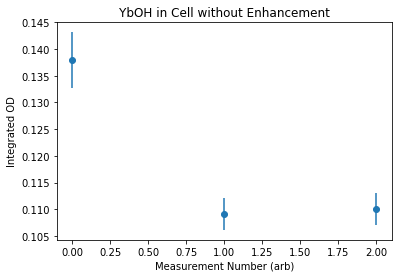

In [151]:
plt.figure()
plt.errorbar(x=list(range(len(b500_avg))),y=b500_avg,yerr=b500_err,marker='o',linestyle='None')
plt.title('YbOH in Cell without Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

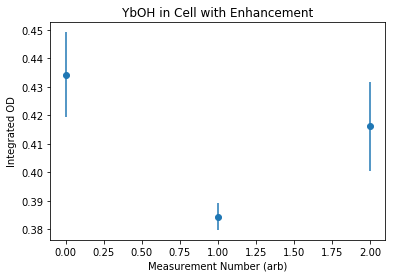

In [152]:
plt.figure()
plt.errorbar(x=list(range(len(ub500_avg))),y=ub500_avg,yerr=ub500_err,marker='o',linestyle='None')
plt.title('YbOH in Cell with Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

In [162]:
enhance_500 = [ub/b for ub,b in zip(ub500_avg,b500_avg)]
enhance_500

[3.1503665921006436, 3.5211888470592547, 3.7831751206368027]

In [163]:
enhance_500_err = [rel_error(ub,b,ub_err,b_err)*ub/b for ub,b,ub_err,b_err in zip(ub500_avg,b500_avg,ub500_err,b500_err)]
enhance_500_err

[0.16138435935836085, 0.10638574764881405, 0.17521550109301492]

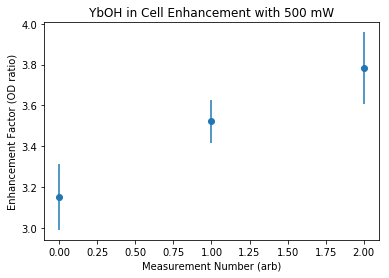

In [164]:
plt.figure()
plt.errorbar(x=list(range(len(enhance_500))),y=enhance_500,yerr=enhance_500_err,marker='o',linestyle='None')
plt.title('YbOH in Cell Enhancement with 500 mW')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Enhancement Factor (OD ratio)');

In [280]:
x=np.array(enhance_500)
xerr=np.array(enhance_500_err)
print(x.mean())
print(x.std())
print(np.sqrt(xerr[0]**2+xerr[1]**2+xerr[2]**2)/x.size)

3.4849101865989005
0.25961351319557435
0.08696315348185756


In [166]:
power_data[0].append(500)
power_data[1].append(3.485)
power_data[2].append(0.150)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

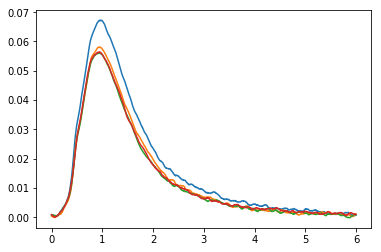

In [190]:
ODs,params=calculateSeriesOD('20190212',102,105)
b100 = integrateODSeries(ODs,params,[0,6])

In [191]:
b100_list = [b100[1:]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

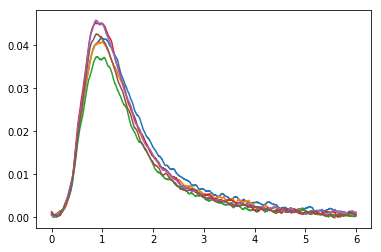

In [192]:
ODs,params=calculateSeriesOD('20190212',115,120)
b100 = integrateODSeries(ODs,params,[0,6])

In [193]:
b100_list.append(b100)

In [202]:
ub100_list = [ub100[1:]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

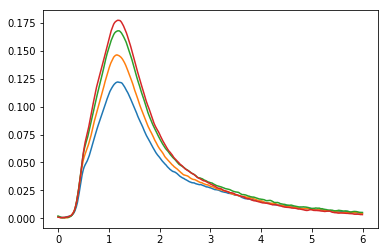

In [206]:
ODs,params=calculateSeriesOD('20190212',111,114)
ub100 = integrateODSeries(ODs,params,[0,6])

In [207]:
ub100_list.append(ub100)

In [208]:
b100_list

[array([0.083781, 0.079875, 0.081939]),
 array([0.067546, 0.062324, 0.054316, 0.064834, 0.064507, 0.059501])]

In [209]:
ub100_avg = [meas.mean() for meas in ub100_list]
b100_avg = [meas.mean() for meas in b100_list]
ub100_err = [meas.std()/np.sqrt(meas.size) for meas in ub100_list]
b100_err = [meas.std()/np.sqrt(meas.size) for meas in b100_list]

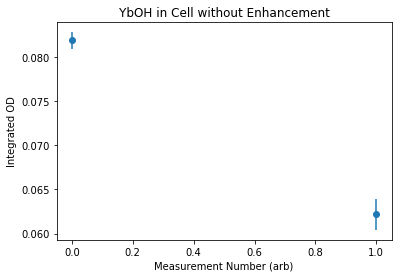

In [210]:
plt.figure()
plt.errorbar(x=list(range(len(b100_avg))),y=b100_avg,yerr=b100_err,marker='o',linestyle='None')
plt.title('YbOH in Cell without Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

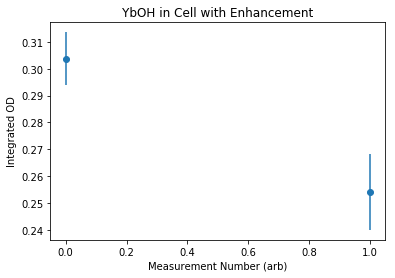

In [211]:
plt.figure()
plt.errorbar(x=list(range(len(ub100_avg))),y=ub100_avg,yerr=ub100_err,marker='o',linestyle='None')
plt.title('YbOH in Cell with Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

In [212]:
enhance_100 = [ub/b for ub,b in zip(ub100_avg,b100_avg)]
enhance_100

[3.7096378183594947, 4.086384936251434]

In [213]:
enhance_100_err = [rel_error(ub,b,ub_err,b_err)*ub/b for ub,b,ub_err,b_err in zip(ub100_avg,b100_avg,ub100_err,b100_err)]
enhance_100_err

[0.12768022152291658, 0.2542717496711352]

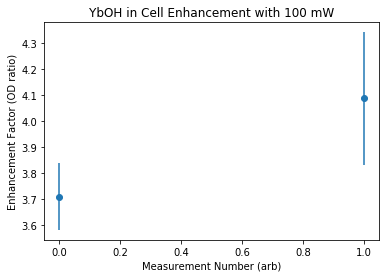

In [214]:
plt.figure()
plt.errorbar(x=list(range(len(enhance_100))),y=enhance_100,yerr=enhance_100_err,marker='o',linestyle='None')
plt.title('YbOH in Cell Enhancement with 100 mW')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Enhancement Factor (OD ratio)');

In [273]:
x=np.array(enhance_100)
print(x.mean())
print(x.std())

3.8980113773054645
0.18837355894596985


In [189]:
power_data[0].append(100)
power_data[1].append(3.8)
power_data[2].append(0.2)

[3.075, 3.485, 3.8]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

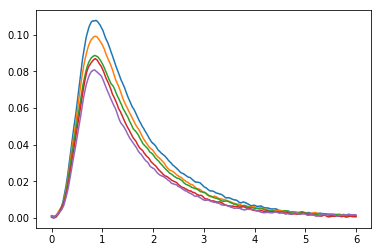

In [219]:
ODs,params=calculateSeriesOD('20190212',121,125)
b400 = integrateODSeries(ODs,params,[0,6])

In [220]:
b400_list = [b400[1:]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

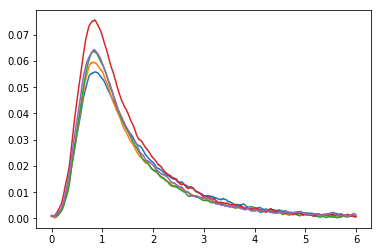

In [223]:
ODs,params=calculateSeriesOD('20190212',138,142)
b400_1 = integrateODSeries(ODs,params,[0,6])

In [226]:
b400_list.append(b400_1)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

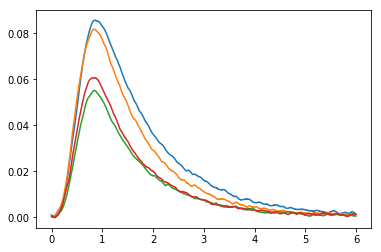

In [225]:
ODs,params=calculateSeriesOD('20190212',143,146)
b400_1 = integrateODSeries(ODs,params,[0,6])

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

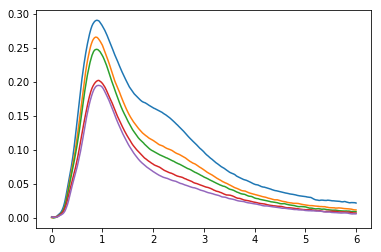

In [227]:
ODs,params=calculateSeriesOD('20190212',126,130)
ub400 = integrateODSeries(ODs,params,[0,6])

In [228]:
ub400_list = [ub400[1:]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

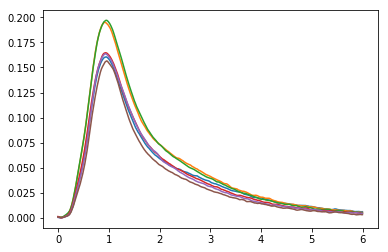

In [230]:
ODs,params=calculateSeriesOD('20190212',131,136)
ub400 = integrateODSeries(ODs,params,[0,6])

In [231]:
ub400_list.append(ub400)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

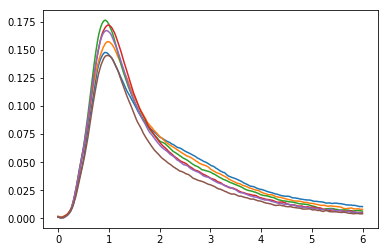

In [232]:
ODs,params=calculateSeriesOD('20190212',147,152)
b400 = integrateODSeries(ODs,params,[0,6])

In [233]:
ub400_list.append(ub400[1:])

In [234]:
ub400_avg = [meas.mean() for meas in ub400_list]
b400_avg = [meas.mean() for meas in b400_list]
ub400_err = [meas.std()/np.sqrt(meas.size) for meas in ub400_list]
b400_err = [meas.std()/np.sqrt(meas.size) for meas in b400_list]

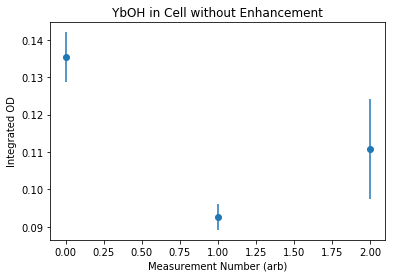

In [235]:
plt.figure()
plt.errorbar(x=list(range(len(b400_avg))),y=b400_avg,yerr=b400_err,marker='o',linestyle='None')
plt.title('YbOH in Cell without Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

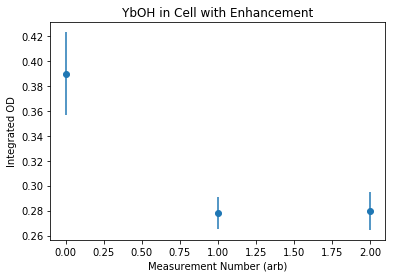

In [236]:
plt.figure()
plt.errorbar(x=list(range(len(ub400_avg))),y=ub400_avg,yerr=ub400_err,marker='o',linestyle='None')
plt.title('YbOH in Cell with Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

In [237]:
enhance_400 = [ub/b for ub,b in zip(ub400_avg,b400_avg)]

In [238]:
enhance_400 = [ub/b for ub,b in zip(ub400_avg,b400_avg)]
enhance_400_err = [rel_error(ub,b,ub_err,b_err)*ub/b for ub,b,ub_err,b_err in zip(ub400_avg,b400_avg,ub400_err,b400_err)]

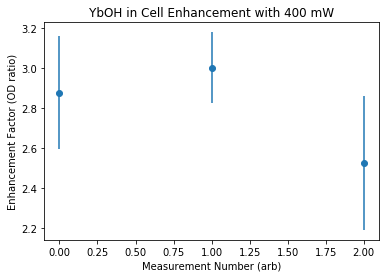

In [265]:
enhance_400 = [ub/b for ub,b in zip(ub400_avg,b400_avg)]
enhance_400_err = [rel_error(ub,b,ub_err,b_err)*ub/b for ub,b,ub_err,b_err in zip(ub400_avg,b400_avg,ub400_err,b400_err)]
plt.figure()
plt.errorbar(x=list(range(len(enhance_400))),y=enhance_400,yerr=enhance_400_err,marker='o',linestyle='None')
plt.title('YbOH in Cell Enhancement with 400 mW')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Enhancement Factor (OD ratio)');

In [272]:
x=np.array(enhance_400)
print(x.mean())
print(x.std())

2.8011337191388432
0.20129415096345224


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

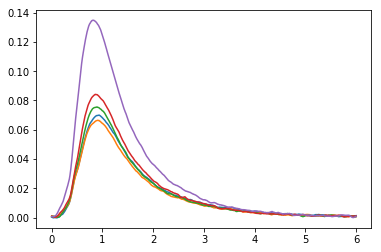

In [244]:
ODs,params=calculateSeriesOD('20190212',159,163)
b200 = integrateODSeries(ODs,params,[0,6])

In [245]:
b200_list = [b200[1:]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

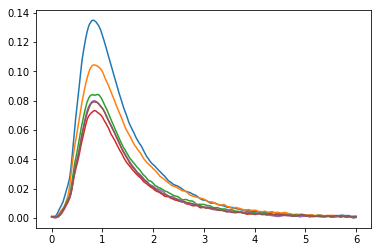

In [246]:
ODs,params=calculateSeriesOD('20190212',163,168)
b200 = integrateODSeries(ODs,params,[0,6])

In [247]:
b200_list.append(b200[1:])

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

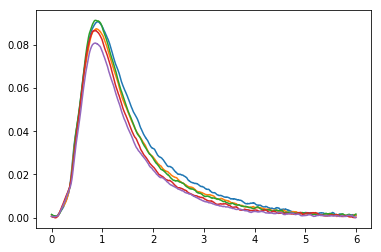

In [248]:
ODs,params=calculateSeriesOD('20190212',180,184)
b200 = integrateODSeries(ODs,params,[0,6])

In [249]:
b200_list.append(b200)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

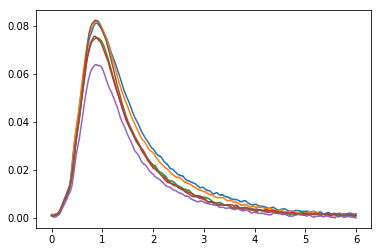

In [250]:
ODs,params=calculateSeriesOD('20190212',185,190)
b200 = integrateODSeries(ODs,params,[0,6])

In [253]:
b200_list.append(b200[1:])

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

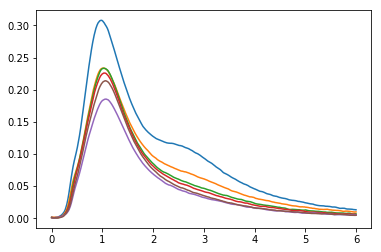

In [252]:
ODs,params=calculateSeriesOD('20190212',153,158)
ub200 = integrateODSeries(ODs,params,[0,6])

In [254]:
ub200_list = [ub200[1:]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

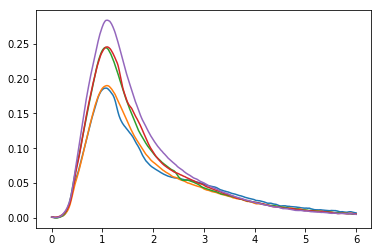

In [255]:
ODs,params=calculateSeriesOD('20190212',169,173)
ub200 = integrateODSeries(ODs,params,[0,6])

In [256]:
ub200_list.append(ub200[1:])

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

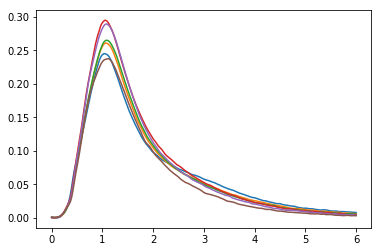

In [257]:
ODs,params=calculateSeriesOD('20190212',174,179)
ub200 = integrateODSeries(ODs,params,[0,6])

In [258]:
ub200_list.append(ub200[1:])

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

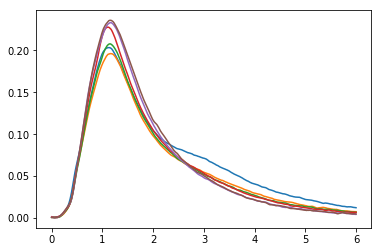

In [261]:
ODs,params=calculateSeriesOD('20190212',191,196)
ub200 = integrateODSeries(ODs,params,[0,6])

In [262]:
ub200_list.append(ub200[1:])

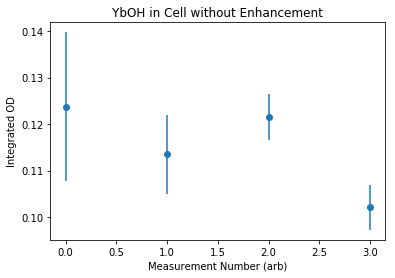

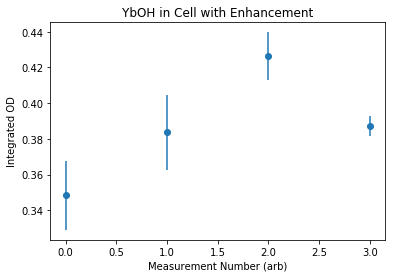

In [263]:
ub200_avg = [meas.mean() for meas in ub200_list]
b200_avg = [meas.mean() for meas in b200_list]
ub200_err = [meas.std()/np.sqrt(meas.size) for meas in ub200_list]
b200_err = [meas.std()/np.sqrt(meas.size) for meas in b200_list]
plt.figure()
plt.errorbar(x=list(range(len(b200_avg))),y=b200_avg,yerr=b200_err,marker='o',linestyle='None')
plt.title('YbOH in Cell without Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');
plt.figure()
plt.errorbar(x=list(range(len(ub200_avg))),y=ub200_avg,yerr=ub200_err,marker='o',linestyle='None')
plt.title('YbOH in Cell with Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

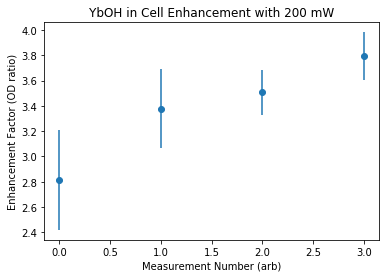

In [283]:
enhance_200 = [ub/b for ub,b in zip(ub200_avg,b200_avg)]
enhance_200_err = [rel_error(ub,b,ub_err,b_err)*ub/b for ub,b,ub_err,b_err in zip(ub200_avg,b200_avg,ub200_err,b200_err)]
plt.figure()
plt.errorbar(x=list(range(len(enhance_200))),y=enhance_200,yerr=enhance_200_err,marker='o',linestyle='None')
plt.title('YbOH in Cell Enhancement with 200 mW')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Enhancement Factor (OD ratio)');

In [284]:
x=np.array(enhance_200)
print(x.mean())
print(x.std())

3.3735064761167854
0.3555971156485243


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

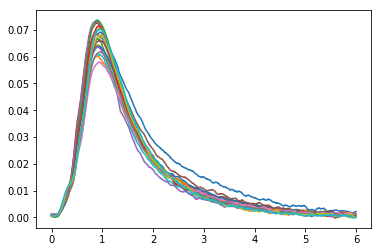

In [275]:
ODs,params=calculateSeriesOD('20190212',197,201)
b50 = integrateODSeries(ODs,params,[0,6])
b50_list = [b50[1:]]
ODs,params=calculateSeriesOD('20190212',212,216)
b50 = integrateODSeries(ODs,params,[0,6])
b50_list.append(b50[1:])
ODs,params=calculateSeriesOD('20190212',217,221)
b50 = integrateODSeries(ODs,params,[0,6])
b50_list.append(b50[1:])
ODs,params=calculateSeriesOD('20190212',234,238)
b50 = integrateODSeries(ODs,params,[0,6])
b50_list.append(b50[1:])

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

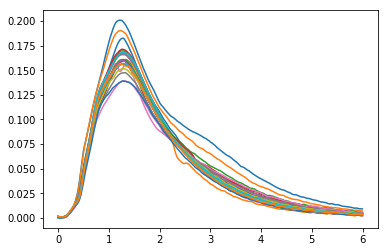

In [276]:
ODs,params=calculateSeriesOD('20190212',202,206)
ub50 = integrateODSeries(ODs,params,[0,6])
ub50_list = [ub50[1:]]
ODs,params=calculateSeriesOD('20190212',207,211)
ub50 = integrateODSeries(ODs,params,[0,6])
ub50_list.append(ub50[1:])
ODs,params=calculateSeriesOD('20190212',222,227)
ub50 = integrateODSeries(ODs,params,[0,6])
ub50_list.append(ub50[1:])
ODs,params=calculateSeriesOD('20190212',228,233)
ub50 = integrateODSeries(ODs,params,[0,6])
ub50_list.append(ub50[1:])

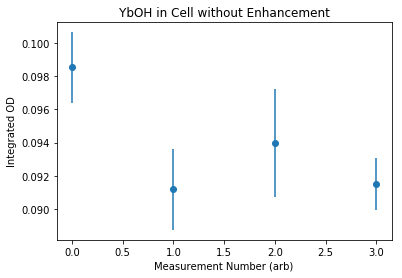

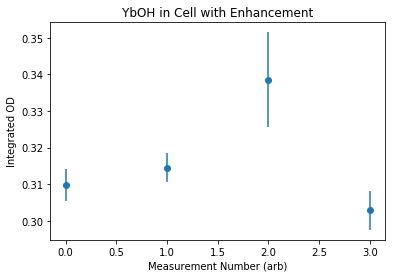

In [277]:
ub50_avg = [meas.mean() for meas in ub50_list]
b50_avg = [meas.mean() for meas in b50_list]
ub50_err = [meas.std()/np.sqrt(meas.size) for meas in ub50_list]
b50_err = [meas.std()/np.sqrt(meas.size) for meas in b50_list]
plt.figure()
plt.errorbar(x=list(range(len(b50_avg))),y=b50_avg,yerr=b50_err,marker='o',linestyle='None')
plt.title('YbOH in Cell without Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');
plt.figure()
plt.errorbar(x=list(range(len(ub50_avg))),y=ub50_avg,yerr=ub50_err,marker='o',linestyle='None')
plt.title('YbOH in Cell with Enhancement')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Integrated OD');

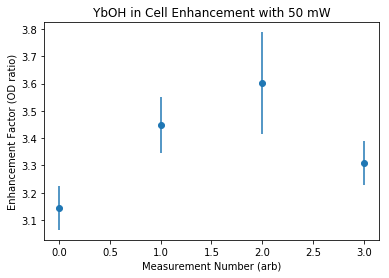

In [285]:
enhance_50 = [ub/b for ub,b in zip(ub50_avg,b50_avg)]
enhance_50_err = [rel_error(ub,b,ub_err,b_err)*ub/b for ub,b,ub_err,b_err in zip(ub50_avg,b50_avg,ub50_err,b50_err)]
plt.figure()
plt.errorbar(x=list(range(len(enhance_50))),y=enhance_50,yerr=enhance_50_err,marker='o',linestyle='None')
plt.title('YbOH in Cell Enhancement with 50 mW')
plt.xlabel('Measurement Number (arb)')
plt.ylabel('Enhancement Factor (OD ratio)');

In [286]:
x=np.array(enhance_50)
print(x.mean())
print(x.std())

3.3759596485590744
0.16941726073102711


In [290]:
power = [50,100,200,300,400,500]
enhance = [3.4,3.9,3.4,3.1,2.8,3.5]
err = 0.4

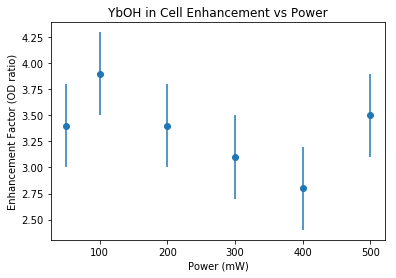

In [291]:
plt.figure()
plt.errorbar(x=power,y=enhance,yerr=err,marker='o',linestyle='None')
plt.title('YbOH in Cell Enhancement vs Power')
plt.xlabel('Power (mW)')
plt.ylabel('Enhancement Factor (OD ratio)');